In [1]:
import numpy as np
import pandas as pd

#pd.options.display.precision=2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
pd.set_option('max_rows', 10)
pd.set_option('precision', 10)

In [3]:
excel_data=pd.read_excel('SalesStats.xlsx')
excel_data.rename(columns={'YEAR':'Year'},inplace=True)

In [4]:
excel_data

,Year,Store,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2003,Agencia Bacolod,100618.8,67545.00,62699.10,55016.1,56048,40477.1,30573.5,41342.6,37349.5,41871.05,28002.0,47260.5,608803.25
1,2003,Centro - Butuan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,2003,Centro - Catbalogan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,2003,Centro - Cauayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,2003,Centro - Daet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2017,Time Value - Davao,0.0,0.00,0.00,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
1230,2017,Time Value Zamboanga,0.0,0.00,0.00,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
1231,2017,Time Zone Roxas,0.0,0.00,0.00,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
1232,2017,Xentro Mall - Santiago,32169.0,24930.75,17740.15,35443.0,0,11456.0,25910.0,15469.2,0.0,0.00,26423.0,64131.4,253672.50


In [5]:
excel_data=excel_data.dropna()
zeroes_data=excel_data.loc[excel_data['Total'] == 0]
excel_data=excel_data.drop(zeroes_data.index)
excel_data

,Year,Store,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2003,Agencia Bacolod,100618.80,67545.00,62699.10,55016.10,56048,40477.10,30573.50,41342.60,37349.50,41871.05,28002.00,47260.50,6.0880325000e+05
24,2003,Ever Ortigas,0.00,0.00,0.00,0.00,0,5495.00,665.00,6277.90,6375.50,2596.00,1455.00,19705.00,4.2569400000e+04
30,2003,Gaisano Bacolod,128899.11,149496.86,112299.40,132918.48,92693.1,100319.15,70873.25,75824.90,69591.05,112952.65,118254.20,175245.26,1.3393674100e+06
33,2003,Gaisano Country Mall,33125.35,31765.38,29940.10,28463.80,44898.85,23019.45,19321.63,15873.90,30191.50,57477.85,18321.70,50411.45,3.8281096000e+05
39,2003,Gaisano Tacloban,178697.30,176925.05,229567.00,188186.45,191944.55,206356.65,164707.30,189483.75,170988.95,245491.35,215964.35,450104.60,2.6084173000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2017,Time Place-Santiago,98794.15,39451.75,36937.00,35479.65,48836.05,60445.00,44489.10,35345.00,33447.00,39413.70,10042.00,58331.60,5.4101200000e+05
1223,2017,Time Station - Candon,119399.50,82768.15,75260.45,59731.00,92366.95,70494.15,64616.30,73834.50,52586.00,39360.00,41612.50,130371.75,9.0240125000e+05
1225,2017,Time Station - Marbel,160275.53,129400.30,75400.75,84045.25,89312.3,114606.87,103859.87,103150.95,96415.90,134884.12,98216.84,273878.84,1.4634475200e+06
1232,2017,Xentro Mall - Santiago,32169.00,24930.75,17740.15,35443.00,0,11456.00,25910.00,15469.20,0.00,0.00,26423.00,64131.40,2.5367250000e+05


In [6]:
excel_data.loc[excel_data['Total'] <= 0]

,Year,Store,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total


In [7]:
melt_data=excel_data.melt(id_vars=['Year','Store'], 
                  value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                  var_name='Month', value_name='Sales')
melt_data.sort_values(['Year','Store'],inplace=True)
display(melt_data.head(3))

,Year,Store,Month,Sales
0,2003,Agencia Bacolod,Jan,100618.8
561,2003,Agencia Bacolod,Feb,67545
1122,2003,Agencia Bacolod,Mar,62699.1


In [8]:
from time import strptime
from datetime import datetime
melt_data['Date']=melt_data.apply(lambda row: datetime(row['Year'],(strptime(row['Month'],'%b').tm_mon),1),axis=1)

melt_data['Sales']=melt_data['Sales'].astype(str)
melt_data['Sales']=melt_data['Sales'].replace(r'\s+', np.nan, regex=True)
melt_data['Sales']=melt_data['Sales'].astype(float)
#melt_data.astype({'Sales':float},inplace=True)
#melt_data.dropna(inplace=True)
#melt_data.astype({'Sales':float})
display(melt_data.head(3))

,Year,Store,Month,Sales,Date
0,2003,Agencia Bacolod,Jan,100618.8,2003-01-01
561,2003,Agencia Bacolod,Feb,67545.0,2003-02-01
1122,2003,Agencia Bacolod,Mar,62699.1,2003-03-01


In [9]:
store_data=melt_data.drop(columns=['Month'])
store_data['Year']=store_data['Year'].astype(str)
store_data.set_index('Date',inplace=True)
display(store_data.head(3))

,Year,Store,Sales
Date,,,
2003-01-01,2003,Agencia Bacolod,100618.8
2003-02-01,2003,Agencia Bacolod,67545.0
2003-03-01,2003,Agencia Bacolod,62699.1


In [10]:
store_data.count()

Year     6732
Store    6732
Sales    6731
dtype: int64

In [11]:
store_data.describe()

,Sales
count,6731.0000000000
mean,70079.9341732284
std,73105.6750280001
min,-43020.2500000000
25%,26883.8000000000
50%,53866.3000000000
75%,91633.6050000000
max,953286.4500000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9F0F9DB70>]],
      dtype=object)

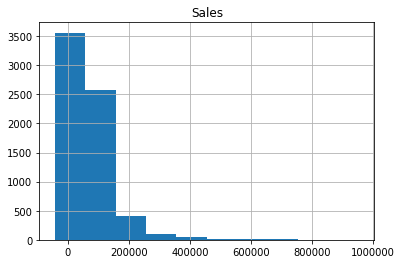

In [12]:
store_data.hist()

In [34]:
data = store_data.groupby('Year')['Store'].nunique()
data

Year
2003    15
2004    17
2005    21
2006    26
2007    34
        ..
2013    47
2014    44
2015    46
2016    50
2017    60
Name: Store, Length: 15, dtype: int64

In [35]:
data=store_data.loc[store_data['Year']=='2017']
data
#data.loc[data.notin('2007')]

,Year,Store,Sales
Date,,,
2017-01-01,2017,Centro - Calbayog,67648.95
2017-02-01,2017,Centro - Calbayog,29128.00
2017-03-01,2017,Centro - Calbayog,48766.00
2017-04-01,2017,Centro - Calbayog,45726.95
2017-05-01,2017,Centro - Calbayog,0.00
...,...,...,...
2017-08-01,2017,Zalora,0.00
2017-09-01,2017,Zalora,3990.00
2017-10-01,2017,Zalora,1995.00


In [19]:
data.loc[(data['Sales']>0) & (data['Sales']<1000)]

,,Sales
Store,Year,
Fitmart - Tacurong,2013,476.3


In [26]:
data.loc[data['Year'].isin('2017')]

KeyError: 'Year'

,Sales
Date,
2003-01-01,1.9777387100e+06
2003-02-01,1.7335998600e+06
2003-03-01,1.9129657400e+06


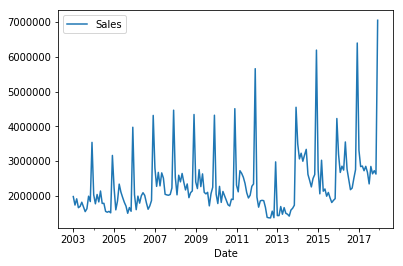

In [154]:
data=store_data.groupby('Date').sum()
display(data.head(3))
data.plot()

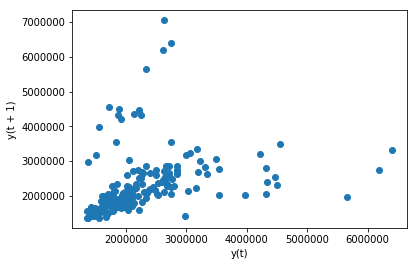

In [155]:
from pandas.plotting import lag_plot
lag_plot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018669496B00>]],
      dtype=object)

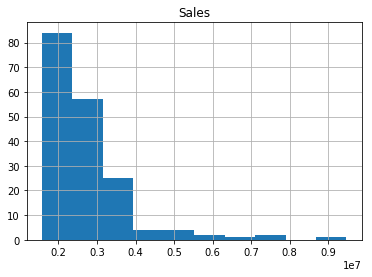

In [9]:
data.hist()

In [10]:

def dec_plot(data):
    from statsmodels.tsa.seasonal import seasonal_decompose
    result=seasonal_decompose(data,model='additive')
    result.plot()
    plt.show();

def corr_plot(data):
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    acf=plot_acf(data,lags=25,zero=False)
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
    pacf=plot_pacf(data,lags=25,zero=False)
    plt.show()
    
def adf_test(data):
    from statsmodels.tsa.stattools import adfuller
    result=adfuller(data['Sales'])
    df_res=pd.Series(result[0:4],index=['ADF Test Statistic','p-value','#lags used','# of observations'])
    for key,value in result[4].items():
        df_res['Critical value (%s)'%key]=value
    print(df_res)

In [11]:
adf_test(data)

ADF Test Statistic       -0.5235209269
p-value                   0.8873442437
#lags used               13.0000000000
# of observations       166.0000000000
Critical value (1%)      -3.4703698981
Critical value (5%)      -2.8791138498
Critical value (10%)     -2.5761394078
dtype: float64


C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


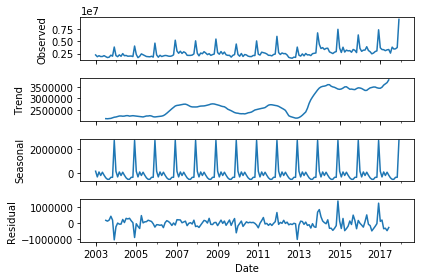

In [12]:
dec_plot(data)

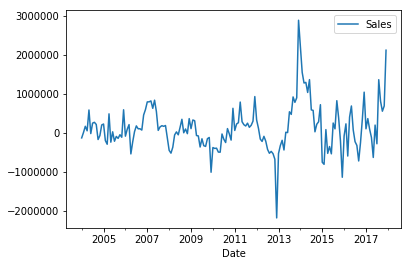

In [13]:
seas_diff=data.diff(12)
seas_diff.dropna(inplace=True)
seas_diff.plot()

In [14]:
adf_test(seas_diff)

ADF Test Statistic       -2.6606099751
p-value                   0.0811059794
#lags used               14.0000000000
# of observations       153.0000000000
Critical value (1%)      -3.4738297757
Critical value (5%)      -2.8806228997
Critical value (10%)     -2.5769448985
dtype: float64


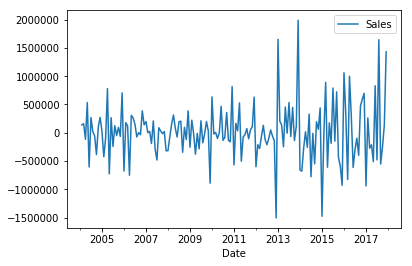

In [15]:
first_diff=seas_diff.diff(1)
first_diff.dropna(inplace=True)
first_diff.plot()

In [16]:
adf_test(first_diff)

ADF Test Statistic       -5.1056919376
p-value                   0.0000136542
#lags used               13.0000000000
# of observations       153.0000000000
Critical value (1%)      -3.4738297757
Critical value (5%)      -2.8806228997
Critical value (10%)     -2.5769448985
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001866B5594E0>]],
      dtype=object)

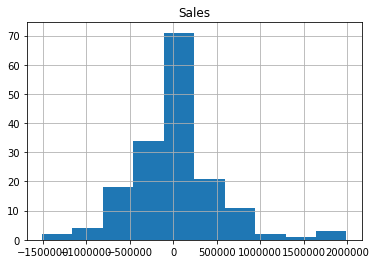

In [17]:
first_diff.hist()

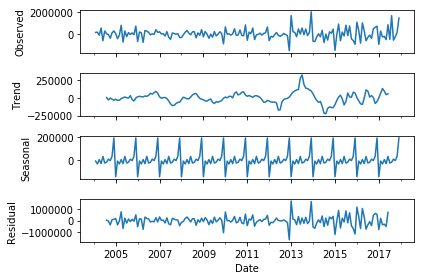

In [18]:
dec_plot(first_diff)

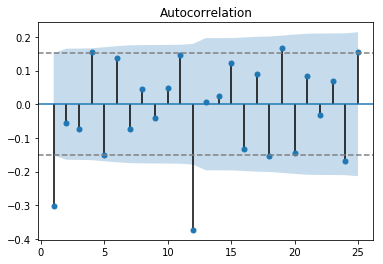

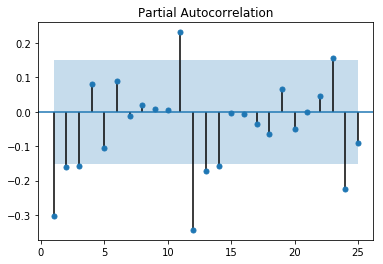

In [19]:
corr_plot(first_diff)

In [20]:
first_diff.index

DatetimeIndex(['2004-02-01', '2004-03-01', '2004-04-01', '2004-05-01',
               '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01',
               '2004-10-01', '2004-11-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=167, freq=None)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX

def acc_score(data,show_res):
    n_data= data[data['Forecast'].notnull()]

    y_true=n_data['Sales']
    y_pred=n_data['Forecast']
    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true,y_pred)
    MAPE=np.mean(np.abs((y_true-y_pred)/y_true))*100
    
    if show_res==True:
        print(' ERROR MEASURES ')
        print('Root Mean Squared Error: ', RMSE)
        print('Mean Absolute Error: ', MAE)
        print('Mean Absolute Percent Error: ', MAPE)
        print('R2 score: ', R2)
    
    return RMSE,MAE,R2,MAPE

def build_model(data,train_data,param,seasonal_param,show_res):
    data_forecast=data.copy()
   
    model=SARIMAX(train_data,order=param,seasonal_order=seasonal_param)
    model_fit=model.fit()
    data_forecast['Forecast']=model_fit.forecast(steps=12)

    if show_res==True:
        print(model_fit.summary())
        
    return data_forecast,model_fit.aic

def grid_search(data,train_data):
    import itertools
    import warnings
    warnings.filterwarnings("ignore")
    
    p=d=q = range(0,3)
    
    pdq=list(itertools.product(p,d,q))
    PDQ=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    
    arima_model=list()
    for param in pdq:
        for seasonal_param in PDQ:
            try:

                data_forecast,model_aic=build_model(data,train_data,param,seasonal_param,False)
                RMSE,MAE,R2,MAPE=acc_score(data_forecast,False)
                arima_model.append([param,seasonal_param,model_aic,RMSE,MAE,MAPE,R2])  
                
            except:
                continue
    columns=['pdq','PDQ','AIC','RMSE','MAE','MAPE','R2']
    grid_res=pd.DataFrame(arima_model,columns=columns)
    grid_res=grid_res.sort_values(by=['RMSE','MAE','MAPE'],ascending=True)
    print(len(arima_model),(len(grid_res)))

    return grid_res

In [22]:
train_data=data.loc[data.index<'2017-01-01']

In [55]:
grid_res=grid_search(data,train_data)
display(grid_res)

389 389


,pdq,PDQ,AIC,RMSE,MAE,MAPE,R2
282,"(2, 0, 0)","(2, 2, 2, 12)",4216.0349853480,6.9107464139e+05,5.7038968557e+05,14.5960621213,0.8370322663
140,"(1, 0, 0)","(2, 2, 2, 12)",4218.4863042245,6.9525355160e+05,5.7147913476e+05,14.6229629701,0.8350553841
157,"(1, 0, 1)","(2, 2, 2, 12)",4215.1048545724,6.9833843698e+05,5.6845023613e+05,14.2907466083,0.8335883967
297,"(2, 0, 1)","(2, 2, 2, 12)",4216.9634924930,7.0264577351e+05,5.6866243855e+05,14.2175261603,0.8315292193
172,"(1, 0, 2)","(2, 2, 2, 12)",4218.1133947722,7.0339974300e+05,5.6826158792e+05,14.1893063110,0.8311674723
...,...,...,...,...,...,...,...
350,"(2, 2, 0)","(0, 0, 0, 12)",5164.9207192395,1.5682359639e+07,1.4552215959e+07,402.6266293705,-82.9217497535
232,"(1, 2, 0)","(0, 0, 2, 12)",5120.2763520726,1.6265348517e+07,1.4979079525e+07,410.2366602423,-89.2772785428
96,"(0, 2, 0)","(0, 0, 1, 12)",5212.4441432063,2.0911512233e+07,1.9217753640e+07,524.2064327756,-148.2184733837
230,"(1, 2, 0)","(0, 0, 0, 12)",5213.6443311751,2.2348300515e+07,2.0579902506e+07,564.6825349877,-169.4279096013


In [23]:
log_data=np.log(data)
log_train_data=log_data.loc[log_data.index<'2017-01-01']

In [22]:
log_grid_res=grid_search(log_data,log_train_data)
display(log_grid_res)

409 409


,pdq,PDQ,AIC,RMSE,MAE,MAPE,R2
264,"(1, 2, 1)","(1, 1, 1, 12)",-266.5587169736,0.1352332520,0.1183900630,0.7818101535,0.7995112077
265,"(1, 2, 1)","(1, 1, 2, 12)",-264.5602883736,0.1355298532,0.1180045708,0.7792315580,0.7986307966
258,"(1, 2, 1)","(0, 1, 1, 12)",-268.1058812165,0.1362841172,0.1190939703,0.7867838196,0.7963832005
395,"(2, 2, 2)","(0, 1, 1, 12)",-268.3166957914,0.1367342674,0.1201895059,0.7933969824,0.7950358754
272,"(1, 2, 1)","(2, 1, 1, 12)",-265.3137438067,0.1369379952,0.1191937329,0.7863028733,0.7944246459
...,...,...,...,...,...,...,...
362,"(2, 2, 0)","(0, 0, 0, 12)",147.5650056595,3.3584735502,3.1073822546,20.5175440070,-122.6536614993
95,"(0, 2, 0)","(0, 0, 1, 12)",134.8090524090,3.5983798580,3.3182912177,21.8862480840,-140.9505665864
96,"(0, 2, 0)","(0, 0, 2, 12)",105.5960305164,3.8116537548,3.4744613569,22.9172817334,-158.2758759496
230,"(1, 2, 0)","(0, 0, 0, 12)",196.6288349435,4.6396901159,4.2630533465,28.1314768149,-234.9940569250


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
columns=data.columns.values
scaled_data = pd.DataFrame(scaled_data, columns=columns,index=data.index.values)
scaled_train_data=scaled_data.loc[scaled_data.index<'2017-01-01']

In [28]:
scaled_grid_res=grid_search(scaled_data,scaled_train_data)
display(scaled_grid_res)

440 440


,pdq,PDQ,AIC,RMSE,MAE,MAPE,R2
417,"(2, 2, 0)","(2, 2, 1, 12)",177.3066908627,0.6076485988,0.5276047199,118.5317781740,0.8421193104
418,"(2, 2, 0)","(2, 2, 2, 12)",179.3039223858,0.6092684029,0.5336382654,116.5299986742,0.8412764659
290,"(1, 2, 0)","(2, 2, 1, 12)",208.8322027578,0.6399064466,0.5793694156,115.4304846377,0.8249117573
77,"(0, 1, 0)","(2, 2, 1, 12)",125.0950323445,0.6452726443,0.5647825354,100.9533123596,0.8219628961
399,"(2, 1, 2)","(2, 2, 1, 12)",109.9712729444,0.6467679768,0.5498394239,94.7952635180,0.8211367860
...,...,...,...,...,...,...,...
401,"(2, 2, 0)","(0, 0, 0, 12)",540.8600155277,14.0139661776,13.0040157713,2721.5701697274,-82.9742517856
276,"(1, 2, 0)","(0, 0, 2, 12)",426.3129193883,14.3044678379,13.2078277293,2723.3199226603,-86.4918146315
117,"(0, 2, 0)","(0, 0, 1, 12)",511.4116379598,14.9956273065,13.8462092599,2841.4564499371,-95.1508857309
274,"(1, 2, 0)","(0, 0, 0, 12)",589.5803326715,19.9565897256,18.3775318789,3792.2543269796,-169.2929508481


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(2, 2, 2, 12)   Log Likelihood               -2101.017
Date:                            Wed, 28 Mar 2018   AIC                           4216.035
Time:                                    16:25:04   BIC                           4237.903
Sample:                                01-01-2003   HQIC                          4224.910
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5959      0.210      2.835      0.005       0.184       1.008
ar.L2          0.2441      0.247   

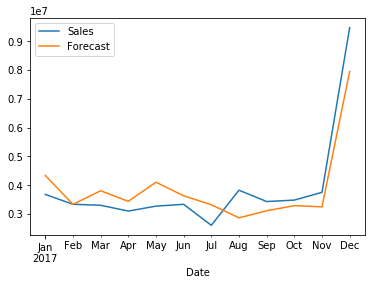

In [25]:
train_data=data.loc[data.index<'2017-01-01']
result,aic=build_model(data,train_data,(2,0,0),(2,2,2,12),True)
acc_score(result,True)
test_data=result.loc[result.index>='2017-01-01']
test_data.plot()

 ERROR MEASURES 
Root Mean Squared Error:  640246.0671347094
Mean Absolute Error:  485485.96631055744
Mean Absolute Percent Error:  11.958972196396202
R2 score:  0.8601232443165233


C:\Users\ndrs\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


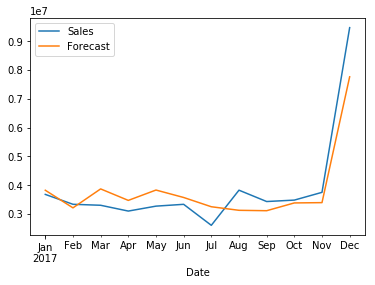

In [26]:
log_result,aic=build_model(log_data,log_train_data,(1,2,1),(1,1,1,12),False)

log_test_data=log_result.loc[log_result.index>='2017-01-01']
log_test_data=np.exp(log_test_data)
acc_score(log_test_data,True)
log_test_data.plot()

 ERROR MEASURES 
Root Mean Squared Error:  680203.1696125534
Mean Absolute Error:  590601.8765607096
Mean Absolute Percent Error:  15.993434247118593
R2 score:  0.8421193104388569


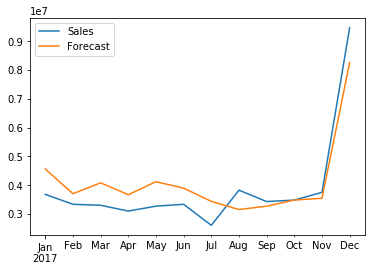

In [27]:
scaled_result,aic=build_model(scaled_data,scaled_train_data,(2,2,0),(2,2,1,12),False)

scaled_test_data=scaled_result.loc[scaled_result.index>='2017-01-01']
scaled_test_data=scaler.inverse_transform(scaled_test_data)
scaled_test_data = pd.DataFrame(scaled_test_data,columns=log_test_data.columns.values,index=log_test_data.index.values)
acc_score(scaled_test_data,True)
scaled_test_data.plot()

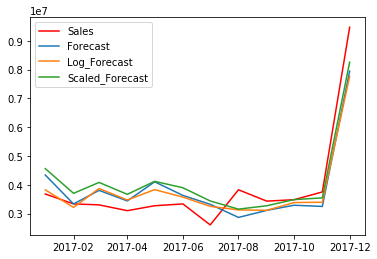

In [29]:
plt.plot(test_data['Sales'],label='Sales',c='red')
plt.plot(test_data['Forecast'],label='Forecast')
plt.plot(log_test_data['Forecast'],label='Log_Forecast')
plt.plot(scaled_test_data['Forecast'],label='Scaled_Forecast')
plt.legend()
plt.show()

In [36]:
print('Final Forecast')
model=SARIMAX(log_data,order=(1,2,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()
print(model_fit.summary())

Final Forecast
                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  180
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                 142.472
Date:                            Wed, 28 Mar 2018   AIC                           -274.943
Time:                                    16:34:27   BIC                           -258.978
Sample:                                01-01-2003   HQIC                          -268.470
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3403      0.086     -3.968      0.000      -0.508      -0.172
ma.L1         -0.993

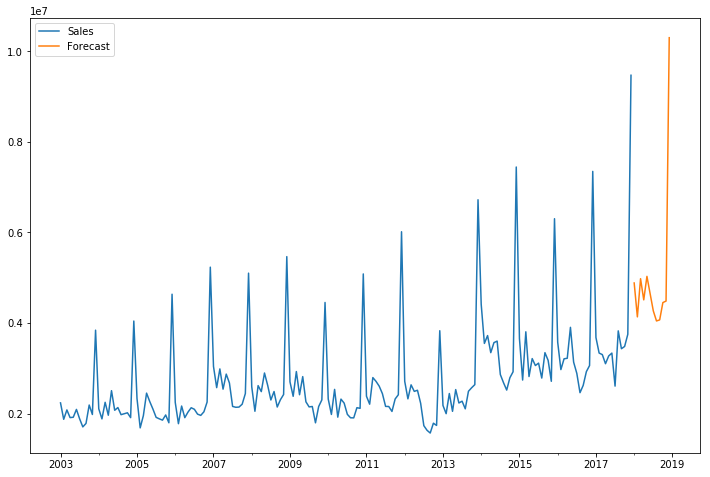

2018-01-01    4.8855173852e+06
2018-02-01    4.1370655217e+06
2018-03-01    4.9799041948e+06
2018-04-01    4.5127937271e+06
2018-05-01    5.0312094389e+06
                    ...       
2018-08-01    4.0471462525e+06
2018-09-01    4.0705852783e+06
2018-10-01    4.4526159805e+06
2018-11-01    4.4862464256e+06
2018-12-01    1.0299365609e+07
Freq: MS, Name: Forecast, Length: 12, dtype: float64


In [37]:
forecast_results=model_fit.forecast(steps=12)
forecast_results.rename('Forecast',inplace=True)
forecast_results=np.exp(forecast_results)
forecast_data=pd.concat((data,forecast_results),axis=1)
forecast_data.plot(figsize=(12,8))
plt.show()
print(forecast_results)

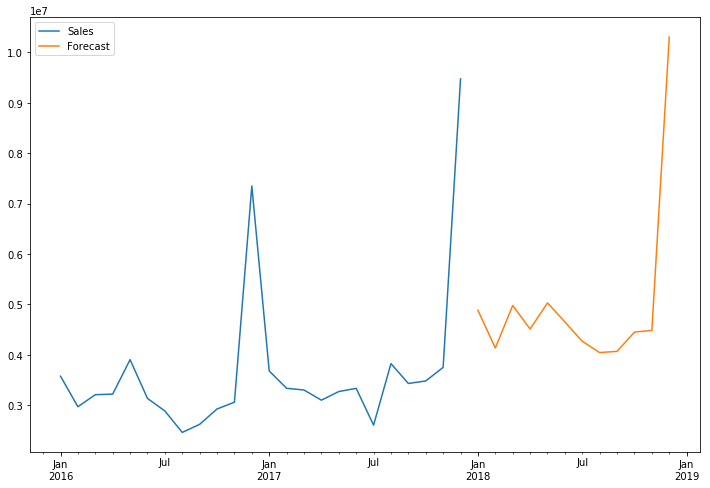

In [38]:
test_data=forecast_data.loc[forecast_data.index>='2016-01-01']
test_data.plot(figsize=(12,8))
plt.show()

In [40]:
writer=pd.ExcelWriter('2018_log_forecast.xlsx')
forecast_data.to_excel(writer,'2018_log_forecast')
writer.save()